In [2]:
#Loading packages

import numpy as np
import geopandas as gp
import pandas as pd
from matplotlib.pyplot import xlim, ylim
import pylab as pl
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Loading energy consumption data

nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [6]:
#Loading number of units data

bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [7]:
#Defining "cancovert" function

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [8]:
#Setting my notebook to print full arrays

numpy.set_printoptions(threshold=numpy.nan)

#Defining vectorized function, applying it to columns and creating boolean indexes 

vfunc = np.vectorize(canconvert)

Energy = nrg['Site EUI(kBtu/ft2)']
Area = nrg['Reported Property Floor Area (Building(s)) (ft²)']

indexEnergy = vfunc(Energy)
indexArea = vfunc(Area)

print indexArea

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [9]:
#Replacing 'False' values for 'NaN's and testing it for Area... it worked!

Energy[~indexEnergy]=float('NaN')
Area[~indexArea]=float('NaN')

indexArea = vfunc(Area)
print indexArea

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [10]:
#Checking if I can print relevant columns as floats... I can!

print Energy.astype(float)
print Area.astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [11]:
#Renaming 'Energy' BBL column to 'BBL'

nrg = nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)':'BBL'})
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
16099,4084010096,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,180.5,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
500,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,Yes,ABS,44,1392.3,337.9,1054.4000000000001,235370,214110,Distribution Center,1
5017,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,No,None,Not Available,673.6,541.79999999999995,131.80000000000001,64806,64816,Multifamily Housing,1
5116,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,No,None,Not Available,485,403,82,62839,62847,Multifamily Housing,1
363,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,No,None,Not Available,435.5,290,145.5,98000,98052,Multifamily Housing,1


In [12]:
#Merging the data through the 'BBL' column

bblnrgdata = pd.merge(nrg, bsize, on=['BBL'])
bblnrgdata.head()

/usr/local/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/usr/local/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,0,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,..."
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,0,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,..."
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,0,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,..."
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,0,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,..."
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130,...,0,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,..."


In [13]:
#Converting Energy/Area columns into floats and multiplying them to get Energy Consumption in kBtu

nEnergy = bblnrgdata['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nArea = bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
bblnrgdata['Energy Consumption (kBtu)'] = nEnergy * nArea
bblnrgdata = bblnrgdata.rename(columns = {'UnitsTotal':'Units Total'})
bblnrgdata

/usr/local/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,Energy Consumption (kBtu)
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,...",1.932388e+07
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,...",8.923786e+06
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,...",6.484985e+06
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,...",7.252000e+06
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130,...,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,...",2.657421e+07
5,1008580014,NaN,1-00858-0014,1016899,80,MADISON AVENUE,Manhattan,10016,Filed,138.30000000000001,...,1923,None,10016,C5-2,None,None,None,8d,"POLYGON ((988236.059799999 210446.8110000044, ...",8.313213e+06
6,1009687501,NaN,1-00968-7501,1022060,630,1 AVENUE,Manhattan,10016,Filed,56909,...,1984,None,10016,C1-9,M1-5,None,None,8d,"POLYGON ((992204.4226000011 210789.5082000047,...",2.606125e+10
7,1011390001,NaN,1-01139-0001,1028849,145,WEST 67 STREET,Manhattan,10023,Filed,88.2,...,1986,None,10023,C4-7,None,None,None,8c,"POLYGON ((988979.4684000015 221890.7784000039,...",4.507029e+07
8,1012090148,NaN,1-01209-00148,1031751,NaN,NaN,Manhattan,NaN,Not on Covered Buildings List,15.7,...,1900,None,10025,R9,None,None,None,5d,"POLYGON ((993619.4018000066 227878.1987999976,...",8.861394e+05
9,1005680024,NaN,1005680024,1032045,60,UNIVERSITY PLACE,Manhattan,10003,Filed,NaN,...,1926,None,10003,C1-7,R7-2,None,None,12c,"POLYGON ((985980.269600004 206319.3540000021, ...",NaN


In [14]:
#Cutting my dataset
bblnrgcut = bblnrgdata[(bblnrgdata['Energy Consumption (kBtu)']>1000) & (bblnrgdata['Energy Consumption (kBtu)']<1e+10) & (bblnrgdata['Units Total']>0) & (bblnrgdata['Units Total']<1000)]
bblnrgcut

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,Energy Consumption (kBtu)
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,...",1.932388e+07
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,...",8.923786e+06
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,...",6.484985e+06
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,...",7.252000e+06
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130,...,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,...",2.657421e+07
5,1008580014,NaN,1-00858-0014,1016899,80,MADISON AVENUE,Manhattan,10016,Filed,138.30000000000001,...,1923,None,10016,C5-2,None,None,None,8d,"POLYGON ((988236.059799999 210446.8110000044, ...",8.313213e+06
7,1011390001,NaN,1-01139-0001,1028849,145,WEST 67 STREET,Manhattan,10023,Filed,88.2,...,1986,None,10023,C4-7,None,None,None,8c,"POLYGON ((988979.4684000015 221890.7784000039,...",4.507029e+07
8,1012090148,NaN,1-01209-00148,1031751,NaN,NaN,Manhattan,NaN,Not on Covered Buildings List,15.7,...,1900,None,10025,R9,None,None,None,5d,"POLYGON ((993619.4018000066 227878.1987999976,...",8.861394e+05
10,1012120110,NaN,1012120110,1032045,155,WEST 81 STREET,Manhattan,10024,Filed,85.7,...,1951,None,10024,R8B,None,None,None,5d,"POLYGON ((990888.7872000039 225024.3105999976,...",6.721880e+06
11,1012747502,NaN,1-01274-7502,1035250,57,WEST 58 STREET,Manhattan,10019,Filed,195.7,...,1901,None,10019,C5-1,None,None,None,8c,"POLYGON ((990848.2504000068 217934.0659999996,...",1.571334e+07


(1000, 10000000000.0)

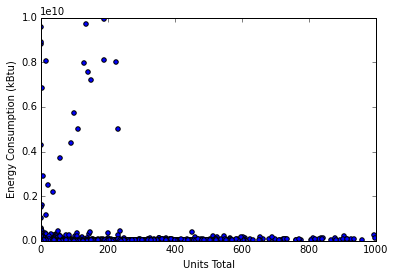

In [15]:
#Plotting Energy Consumption vs. Units Total

bblnrgcut.plot(kind='scatter', x='Units Total', y='Energy Consumption (kBtu)')
xlim(1,1000)
ylim(1000,1e10)

The points are too scrunched against the axis, so it's recommendable to try a log plot in this case.

(1000000.0, 1000000000.0)

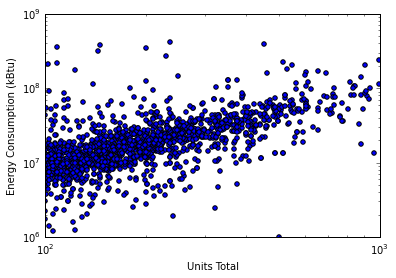

In [16]:
#Trying a log plot

bblnrgcut.plot(kind='scatter', x='Units Total', y='Energy Consumption (kBtu)', loglog=True)
xlim(100,1000)
ylim(1e6,1e9)

The plot looks significantly better with the use of log, indicating that we should keep this approach in the rest of our analysis. As expected, there seems to be a positive correlation between the total of units in a building and its energy consumption.

In [27]:
#Fitting a line through the data

X1 = np.log10(bblnrgcut['Units Total'])
Y1 = np.log10(bblnrgcut['Energy Consumption (kBtu)'])

model1 = sm.OLS(Y1, sm.add_constant(X1), mising='drop').fit()
print model1.summary()
print model1.params

print X

                                OLS Regression Results                               
Dep. Variable:     Energy Consumption (kBtu)   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                  0.011
Method:                        Least Squares   F-statistic:                     56.32
Date:                       Tue, 13 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                               19:52:13   Log-Likelihood:                -3378.5
No. Observations:                       4956   AIC:                             6761.
Df Residuals:                           4954   BIC:                             6774.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

(5, 9)

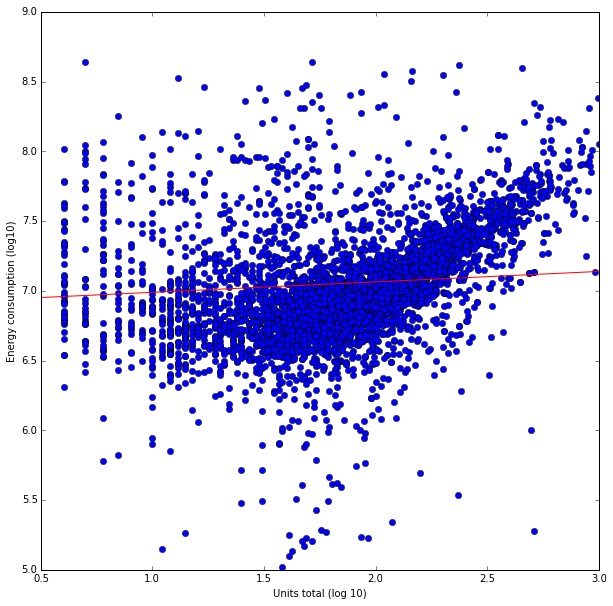

In [68]:
fig1 = figure(figsize = (10, 10))
XLR1 = arange(0, 10, 1)
YLR1 = model1.params[1]*XLR1+model1.params[0]
ax1 = fig1.add_subplot(111)
ax1.plot(X1, Y1, 'o')
ax1.plot(XLR1, YLR1, 'red')
plt.ylabel('Energy consumption (log10)')
plt.xlabel('Units total (log 10))
xlim(0.5, 3)
ylim(5, 9)

In [65]:
#Inverting the axis

X2 = np.log10(bblnrgcut['Energy Consumption (kBtu)'])
Y2 = np.log10(bblnrgcut['Units Total'])

model2 = sm.OLS(Y2, sm.add_constant(X2), mising='drop').fit()
print model2.summary()
print model1.params

                            OLS Regression Results                            
Dep. Variable:            Units Total   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        20:19:17   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
const                 

(0.5, 3)

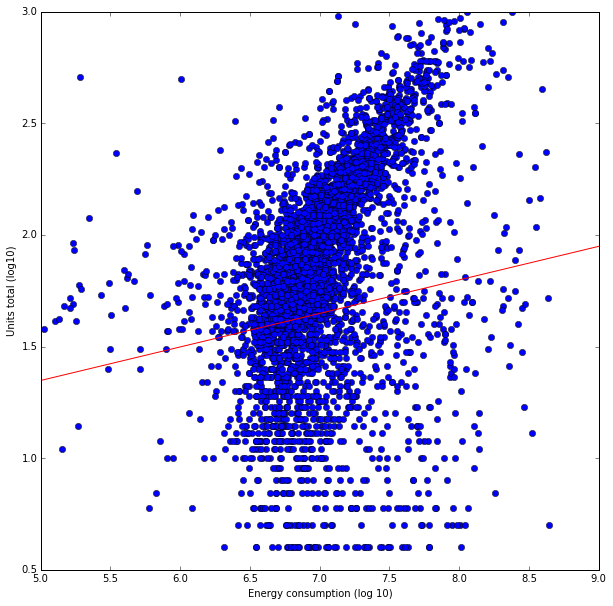

In [66]:
fig2 = figure(figsize = (10, 10))
XLR2 = arange(0, 15, 1)
YLR2 = model2.params[1]*XLR2+model2.params[0]
ax2 = fig2.add_subplot(111)
ax2.plot(X2, Y2, 'o')
ax2.plot(XLR2, YLR2, 'red')
plt.ylabel('Units total (log10)')
plt.xlabel('Energy consumption (log 10)')
xlim(5, 9)
ylim(0.5, 3)

CONCLUSION: Having Units Total in the X axis and Energy Consumption in the Y axis is better, given Energy Consumption is logically a function of Units Total, and not the other way around. Based on the graphs, we can see that the Energy Consumption data is somewhat clustered, whiled the Units Total data is spread. As a result, treating Energy consumption as the dependent variable makes the fit more meaningful/useful. A log-likelihood test is not possible given the two models have the same numbers of parameters, making the degrees of freedom equal to zero.

In [71]:
#Fitting a second degree curve

secdegree = np.polyfit(X1, Y1, 2)
print secdegree

[ 0.32985754 -0.7906098   7.28993951]


(5, 9)

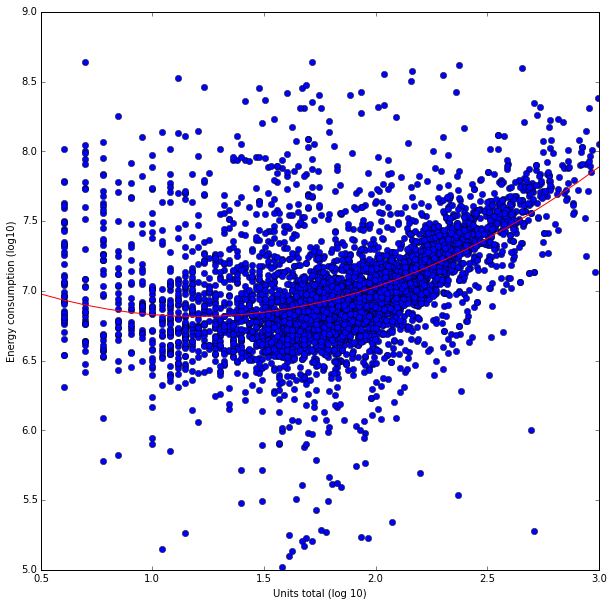

In [81]:
fig3 = figure(figsize = (10, 10))
XLR3 = arange(0, 10, 0.1)
YLR3 = secdegree[0]*XLR3**2+secdegree[1]*XLR3+secdegree[2]
ax3 = fig3.add_subplot(111)
ax3.plot(X1, Y1, 'o')
ax3.plot(XLR3, YLR3, 'red')
plt.ylabel('Energy consumption (log10)')
plt.xlabel('Units total (log 10)')
xlim(0.5, 3)
ylim(5, 9)

CONCLUSION: Based on the graphs, a second degree curve is certainly a better fit for the data. A log-likelihood test is possible in this case given the introduction of a new parameter, making the degrees of freedom different than zero.